### We have a two exploring function and interval $x \in [-N, N]$, when N is number of variant
$$F_1(x, y) = (x - N)^2 + (2 * y - N)^2$$

$$F_2(x, y) = \frac{N}{10}(y - x^2)^2 + (N - x)^2$$

#### For N = 4, we have functions:
$$F_1(x, y) = (x - 4)^2 + (2 * y - 4)^2$$

$$F_2(x, y) = \frac{4}{10}(y - x^2)^2 + (4 - x)^2$$

#### We need to find a analytic minimum value for these functions:
$\frac{dF_1}{dx}= 2(x - 4) = 0    \Rightarrow   x = 4$  

$\frac{dF_1}{dy}= 8(y - 2) = 0    \Rightarrow   y = 2$

Then $min(F_1(x, y)) = F_1(4, 2) = 0$
***
$\frac{dF_2}{dx}= -8 + 1.6 x^3 + x (2 - 1.6 y) = 0$      
$\frac{dF_2}{dx}= 0.8(-x^2 + y)$    

Then solve system, which consisting of two equations $\Rightarrow$

$ x = 4, y =  16$


$min(F_2(x, y)) = F_2(4, 16) = 0$

In [1]:
from abc import ABC, abstractmethod
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class Vec2d:
    def __init__(self, x=0.0, y=0.0):
        self.x = float(x)
        self.y = float(y)

    def __str__(self):
        return f"x = {self.x}\ny = {self.y}"

    def __add__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x + other, self.y + other)
        elif isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x - other, self.y - other)
        elif isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x * other, self.y * other)
        elif isinstance(other, Vec2d):
            return self.x * other.x + self.y * other.y

    def __truediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Vec2d(self.x / other, self.y / other)
        elif isinstance(other, Vec2d):
            return self.x / other.x + self.y / other.y

    __rmul__ = __mul__

    def len(self):
        return int(math.sqrt(self.x ** 2 + self.y ** 2))

    def int_pair(self):
        return int(self.x), int(self.y)

In [3]:
def func_first(N: int):
    def function(point: Vec2d):
        return (point.x - N) ** 2 + (2 * point.y - N) ** 2
    return function

def func_second(N: int):
    def function(point: Vec2d):
        return 0.1 * N * (point.y - point.x**2)**2 + (N - point.x)**2
    return function

In [49]:
class AnalysisFunction:
    def __init__(self,function, N, point: Vec2d, name):
        self.N = N
        self.a = -2 * N
        self.b = 6 * N
        self.func = function
        self.name = name
        self.precise_solution = x
        self.start_point_x = -1.2 * N
        self.start_point_y = N
        
    def make_solution(self, method):
        analysis_method = method(self.func, self.a, self.b, 
                          self.start_point_x, self.start_point_y, self.N)
        points = analysis_method.get_list_finding_values()
        result = [[], []]
        for point in points:
            result[0].append(point.x)
            result[1].append(point.y)
        self.result = result
        
    def plot_graph(self):
        xlist = np.linspace(-2 * self.N, 2 * self.N, 200)
        ylist = np.linspace(0, 1.5 * self.N * self.N, 200)
        X, Y = np.meshgrid(xlist, ylist)
        Z = self.make_2d_array(ylist, xlist)

        plt.figure()

        cp = plt.contourf(X, Y, Z, 10)
        plt.colorbar(cp)
        plt.plot(self.result[0], self.result[1], linewidth=2)
        plt.title('Graphic of '+ self.name)
        plt.show()
        
    def build_table(self):
        f = []
        length = range(len(self.result[0]))
        for i in length:
            value = self.func(Vec2d(self.result[0][i], self.result[1][i]))
            f.append(value)
        
        table = pd.DataFrame({
            'num of iter': list(length),
            'x1': self.result[0],
            'x2': self.result[1],
            self.name: f,
        })
        return table
    
    def make_2d_array(self, x, y):
        f = [[self.func(Vec2d(y_, x_)) for y_ in y] for x_ in x]
        return f

In [50]:
N = 4
x = 4
y = 16

In [51]:
class MethodFindingMinValue(ABC):
    def __init__(self, func, a: float, b: float, point_x, point_y, N: int):
        self.func = func
        self.a = a
        self.b = b
        self.N = N
        self.start_point_x = point_x
        self.start_point_y = point_y
        self.eps = 0.0001
        self.result = None
        
    def get_min_value(self):
        return self.get_list_finding_values()[-1]
    
    @abstractmethod
    def get_list_finding_values(self):
        pass

    
class GradientDescent(MethodFindingMinValue):
    def __init__(self, func, a: float, b: float, point_x, point_y, N: int):
        super().__init__(func, a, b, point_x, point_y, N)

    def get_list_finding_values(self):
        k_iter = 0
        n = 2
        start_point = Vec2d(self.start_point_x, self.start_point_y)
        result = [start_point]
        while k_iter < 200:
            prev_point = result[k_iter]
            cur = [prev_point.x, prev_point.y]
            for i in range(n):
                alpha = self.golden_section(cur[i-1], i)
                cur[i] = alpha
            cur_point = Vec2d(cur[0], cur[1])
            result.append(cur_point)
            k_iter += 1
            if math.sqrt((cur_point.x - prev_point.x) ** 2 + (cur_point.y - prev_point.y) ** 2) < self.eps:
                self.result = result
                return result
        self.result = result
        return result
    
    def golden_section(self, x_const, i) -> float:
        start = self.a
        finish = self.b
        TAU = (5**0.5 - 1) / 2
        n = 0
        eps_n = (self.b - self.a) / 2
        while eps_n >= self.eps:
            x_one = start + (finish - start) * ((3 - 5**0.5) / 2)
            x_two = start + (finish - start) * ((5**0.5 - 1) / 2)
            if i == 0:
                point_one = Vec2d(x_one, x_const)
                point_two = Vec2d(x_two, x_const)
            elif i == 1:
                point_one = Vec2d(x_const, x_one)
                point_two = Vec2d(x_const, x_two)
            if self.func(point_one) <= self.func(point_two):
                finish = x_two
            else:
                start = x_one
            eps_n *= TAU
        x_approxim = (start + finish) / 2
        return x_approxim


In [52]:
analysis_first_func = AnalysisFunction(func_first(N), N, Vec2d(x, y), 'F1')
analysis_first_func.make_solution(GradientDescent)

In [53]:
analysis_second_func = AnalysisFunction(func_second(N), N, Vec2d(x, y), 'F2')
analysis_second_func.make_solution(GradientDescent)

#### Table of result of a Gradient descent method (first function)

In [54]:
analysis_first_func.build_table()

,num of iter,x1,x2,F1
0,0,-4.80000,4.000000,9.344000e+01
1,1,3.99998,1.999999,4.193447e-10
2,2,3.99998,1.999999,4.193447e-10


#### Table of result of a Gradient descent method (second function)

In [55]:
analysis_second_func.build_table()

,num of iter,x1,x2,F2
0,0,-4.800000,4.000000,222.448640
1,1,2.233486,4.988431,3.120571
2,2,2.410901,5.812468,2.525236
3,3,2.553588,6.520819,2.092108
4,4,2.672388,7.141675,1.762553
...,...,...,...,...
163,163,3.998364,15.986908,0.000003
164,164,3.998481,15.987907,0.000002
165,165,3.998599,15.988787,0.000002
166,166,3.998672,15.989405,0.000002


#### Graphic of projection (first function)

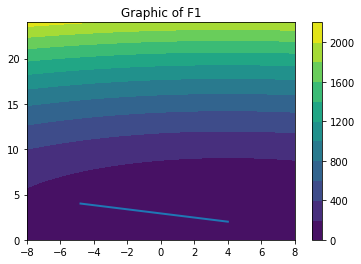

In [56]:
analysis_first_func.plot_graph()

#### Graphic of projection (second function)

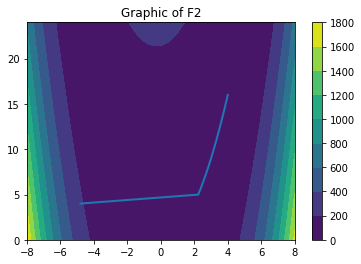

In [57]:
analysis_second_func.plot_graph()